# Week 5 Assignment

## <span style="color:red">Programming Assignment 5: Neural Network on the notMIST dataset</span>

Create a new Jupyter notebook. Using the code in the bottom of the Week 4 notebook, import the notMNIST dataset and create a training/testing split of the data. 

Train a neural network on the dataset using Keras. Experiment with both sigmoid and ReLU activations, different numbers of neurons in each layer, and different regularization settings. (Only use dense layer for this assignment.)

Plot the loss of the network (using 'categorical_crossentropy').

Keep your best result. Save the notebook as HTML and turn it in as a zip.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import cross_validation
from scipy.io import loadmat
data = loadmat('notMNIST_small.mat')
X_temp = data['images']/255

#for i in range(X_temp.shape[2]):
    
X = np.empty(shape=[X_temp.shape[2]] + [784], dtype='float32')
for i in range(X_temp.shape[2]):
    X[i,:] = X_temp[:,:,i].flatten()

y = pd.get_dummies(data['labels']).as_matrix()

print X_temp.shape
print X.shape
print y.shape
X[1,:]

(28, 28, 18724)
(18724, 784)
(18724, 10)


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([0.        , 0.00392157, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03137255, 0.16078432, 0.38039216, 0.6509804 , 0.87058824,
       0.9764706 , 0.90588236, 0.6627451 , 0.4       , 0.11764706,
       0.        , 0.00784314, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07450981,
       0.3647059 , 0.44313726, 0.42745098, 0.4627451 , 0.5019608 ,
       0.54509807, 0.6392157 , 0.77254903, 0.8627451 , 0.9607843 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99607843, 1.        , 0.94509804, 0.42352942, 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01176471, 0.654902  , 1.        , 0.9843137 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99607843, 0.98039216, 0.972549  ,
       0.99215686, 1.        , 0.99607843, 0.9882353 , 0.99215

(28, 28)


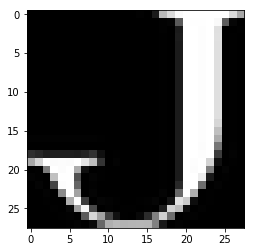

In [2]:
print X_temp[:,:,3].shape
plt.imshow(X_temp[:,:,3],cmap="gray");

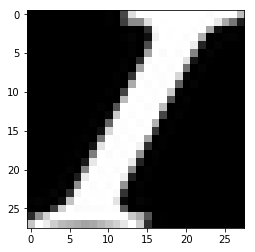

In [3]:
plt.imshow(X_temp[:,:,4504],cmap="gray");

To feed notMNIST instances into a neural network, they need to be reshaped, from a 2 dimensional image representation to a single dimension sequence.

In [4]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=50)
print X_train.shape
print y_train.shape

print X_test.shape
print y_test.shape

(14979, 784)
(14979, 10)
(3745, 784)
(3745, 10)


The code in our example uses the Sequential class. It first calls the constructor, after which calls are made to the add() method to add layers to the model. 

The first such call adds a layer of type Dense ("Just your regular densely-connected NN layer").

We can see also a subset of "Dropout" blocks between our Dense methods. Dropout  is a regularization technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

# Simple Neural Network

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.regularizers import l2, l1
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import livelossplot

plot_losses = livelossplot.PlotLossesKeras()

# Build Neural Network 
# Dropout rate between 20% to 50% s used as is a weight constraint.
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=[784]))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#Softmax - multiple dimentions
#Sigmoid - uni-dimentional

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [70]:
# Summary of neural network
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_45 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_46 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_47 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 10)                1290      
Total para

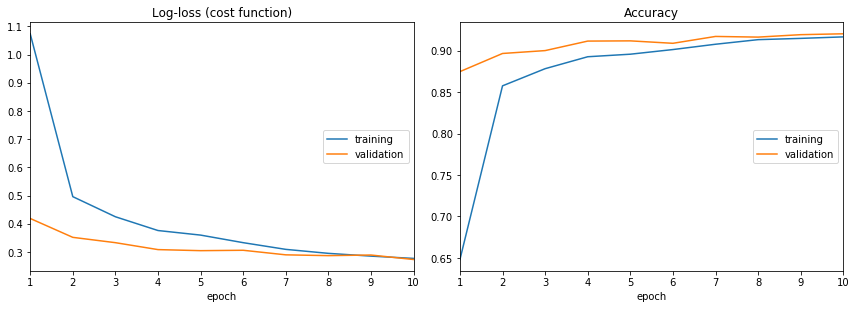

('Test loss:', 0.2732940193648682)
('Test accuracy:', 0.9204272363150868)


In [71]:
# Train model
model.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, y_test))

# Loss and Accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

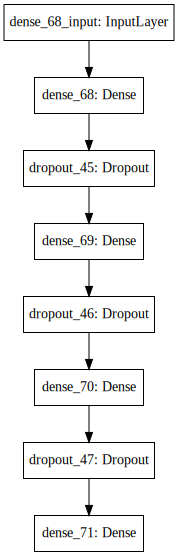

In [72]:
# Output network visualization
SVG(model_to_dot(model).create(prog='dot', format='svg'))